In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

In [31]:
data = sns.load_dataset('iris')

In [32]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [34]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [35]:
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


In [36]:
X = data[['sepal_length','sepal_width','petal_length','petal_width']].values
Y = data['species'].values

In [37]:
print(X.shape, Y.shape)

(150, 4) (150,)


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [39]:
Y_train = np.eye(3)[Y_train]  # shape = (n_train,3)
Y_test  = np.eye(3)[Y_test]   # shape = (n_test,3)

In [40]:
print(Y_train.shape, Y_test.shape)

(120, 3) (30, 3)


In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [42]:
X_train = np.hstack((X_train_scaled, np.ones((X_train_scaled.shape[0],1))))
X_test  = np.hstack((X_test_scaled, np.ones((X_test_scaled.shape[0],1))))

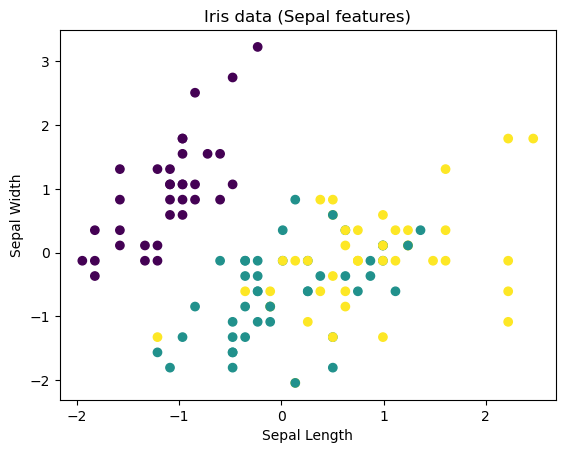

In [43]:
plt.scatter(X_train[:,0], X_train[:,1], c=np.argmax(Y_train,axis=1), cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris data (Sepal features)')
plt.show()

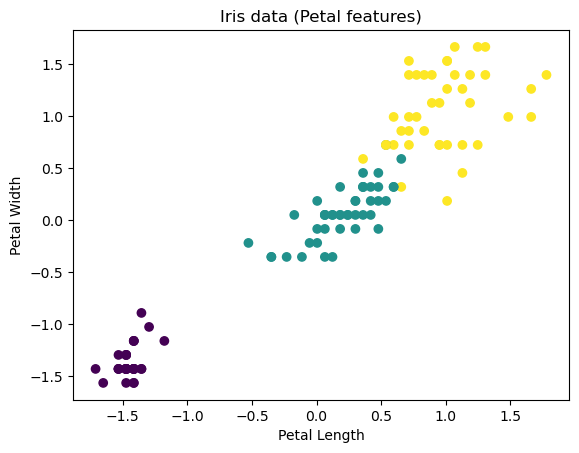

In [44]:
plt.scatter(X_train[:,2], X_train[:,3], c=np.argmax(Y_train,axis=1), cmap='viridis')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Iris data (Petal features)')
plt.show()

In [45]:
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # stabilité numérique
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [46]:
def model(X, theta):
    return softmax(X.dot(theta))

In [47]:
def cost_function(X, Y, theta):
    m = len(Y)
    A = model(X, theta)
    return -1/m * np.sum(Y * np.log(A + 1e-8))  # +1e-8 pour éviter log(0)

In [48]:
def grad(X, Y, theta):
    m = len(Y)
    A = model(X, theta)
    return 1/m * X.T.dot(A - Y)

In [49]:
def gradient_descent(X, Y, learning_rate, n_iterations):
    theta = np.random.randn(X.shape[1], Y.shape[1])
    cost_history = np.zeros(n_iterations)
    for i in range(n_iterations):
        theta -= learning_rate * grad(X, Y, theta)
        cost_history[i] = cost_function(X, Y, theta)
    return theta, cost_history

In [50]:
theta, cost_history = gradient_descent(X_train, Y_train, learning_rate=0.1, n_iterations=2000)

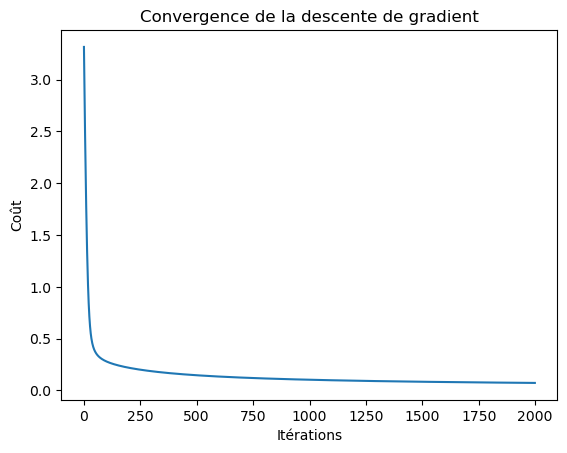

In [51]:
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Itérations")
plt.ylabel("Coût")
plt.title("Convergence de la descente de gradient")
plt.show()

In [52]:
pred_train = np.argmax(model(X_train, theta), axis=1)
pred_test  = np.argmax(model(X_test, theta), axis=1)

In [53]:
y_train_labels = np.argmax(Y_train, axis=1)
y_test_labels  = np.argmax(Y_test, axis=1)

In [54]:
print("Accuracy sur le train:", accuracy_score(y_train_labels, pred_train))
print("Accuracy sur le test :", accuracy_score(y_test_labels, pred_test))

Accuracy sur le train: 0.9833333333333333
Accuracy sur le test : 0.9333333333333333
